This Notebook contains NDVI and EVI maps using geemap, timelapse for vegitaion index, time series graphs of EVI and NDVI for Maharashtra state and widgets for taking user inputs

In [114]:
!pip install geemap

In [ ]:
import ee
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

In [116]:
import ipywidgets as widgets
style = {'description_width': 'initial'}

year = widgets.IntSlider(description='Start Year:', value=2013, min=2013, max=2021, style=style)
month = widgets.IntSlider(description='Start Month:', value=5, min=1, max=12, style=style)
hbox = widgets.HBox([year, month])
hbox

In [117]:
add_layer = widgets.Button(
    description='Add Layer',
    button_style='primary',
    tooltip='Click to add layer',
    style=style
)

output1 = widgets.Output()

hbox2 = widgets.HBox([add_layer])
hbox2

In [118]:
import geemap

map = geemap.Map(center=[40,-100], zoom=4)

def submit_check(b):
    
    with output1:
        output1.clear_output()
            
        start_date = str(year.value)+ '-' + str(month.value).zfill(2) + '-01'
        end_date = str(year.value)+ '-' + str(month.value).zfill(2) + '-30'
        
        print('Computing...')
        image = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterDate(start_date, end_date).min()
        nir = image.select('B5')
        red = image.select('B4')
        ndvi = nir.subtract(red).divide(nir.add(red)).rename('NDVI')
        ndviParams = {'min': -1, 'max': 1, 'palette': ['blue', 'white', 'green']}
        evi = image.expression(
            '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))', {
            'NIR': image.select('B5'),
            'RED': image.select('B4'),
            'BLUE': image.select('B2')
        })
        eviParams = {'min': -1, 'max': 1, 'palette': ['blue', 'white', 'green']}
        map.addLayer(ndvi, ndviParams, 'NDVI image')
        map.addLayer(evi, eviParams, 'EVI image')
        print(type(map))

add_layer.on_click(submit_check)
map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [119]:
output1

Output()

In [120]:
# output1
# image = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterDate('2021-10-01', '2021-10-31').min()

In [121]:
# nir = image.select('B5')
# red = image.select('B4')

# ndvi = nir.subtract(red).divide(nir.add(red)).rename('NDVI')

# ndviParams = {'min': -1, 'max': 1, 'palette': ['blue', 'white', 'green']}

In [122]:
# evi = image.expression(
#     '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))', {
#       'NIR': image.select('B5'),
#       'RED': image.select('B4'),
#       'BLUE': image.select('B2')
# })
# eviParams = {'min': -1, 'max': 1, 'palette': ['blue', 'white', 'green']}

In [123]:
# import geemap

# map = geemap.Map(center=[40,-100], zoom=4)
# map.addLayer(ndvi, ndviParams, 'NDVI image')
# map.addLayer(evi, eviParams, 'EVI image')
# map.set_plot_options(plot_type='bar', add_marker_cluster=True)
# map

In [124]:
start_year = widgets.IntSlider(description='Start Year:', value=1984, min=1984, max=2020, style=style)
end_year = widgets.IntSlider(description='End Year:', value=2020, min=1984, max=2020, style=style)
start_month = widgets.IntSlider(description='Start Month:', value=5, min=1, max=12, style=style)
end_month = widgets.IntSlider(description='End Month:', value=10, min=1, max=12, style=style)
dropdown = widgets.Dropdown(
    options=['NDVI', 'EVI'],
    value='NDVI',
    description='Index:'
)
hbox3 = widgets.HBox([start_year, end_year, start_month, end_month, dropdown])
hbox3

In [125]:
create_gif = widgets.Button(
    description='Create timelapse',
    button_style='primary',
    tooltip='Click to create timelapse',
    style=style
)

download_gif = widgets.Button(
    description='Download GIF',
    button_style='primary',
    tooltip='Click to download timelapse',
    disabled=False,
    style=style
)

output = widgets.Output()

hbox5 = widgets.HBox([create_gif])
hbox5

In [126]:
def submit_clicked(b):
    
    with output:
        output.clear_output()
        if start_year.value > end_year.value:
            print('The end year must be great than the start year.')
            return
        if start_month.value > end_month.value:
            print('The end month must be great than the start month.')
            return        
        if start_year.value == end_year.value:
            add_progress_bar = False
        else:
            add_progress_bar = True
            
        start_date = str(start_month.value).zfill(2) + '-01'
        end_date = str(end_month.value).zfill(2) + '-30'
        
        print('Computing...')
        if dropdown.value=='NDVI':
          label="Timelapse for NDVI"
          map.add_landsat_ts_gif(label= label, bands=['Blue', 'NIR', 'Red'], nd_bands=['NIR', 'Red'], nd_palette=['blue', 'white', 'green'], nd_threshold=0.3, start_year=start_year.value, end_year=end_year.value,start_date=start_date, end_date=end_date,add_progress_bar= add_progress_bar, frames_per_second=5)
        # else:
        #   label="Timelapse for EVI"
        #   map.add_landsat_ts_gif(label= label, bands=['Blue', 'NIR', 'Red'], nd_bands=['Blue','NIR', 'Red'], nd_palette=['blue', 'white', 'green'], nd_threshold=0.3, start_year=start_year.value, end_year=end_year.value,start_date=start_date, end_date=end_date,add_progress_bar= add_progress_bar, frames_per_second=5)


create_gif.on_click(submit_clicked)

In [127]:
output

Output()

In [128]:
!pip install proplot
!pip install ipygee

In [129]:
import numpy as np # yes, numpy!
import pandas as pd # yes, pandas!
import proplot as plot 
import matplotlib.pyplot as plt
from ipygee import chart
from pandas.plotting import register_matplotlib_converters

In [130]:
admin2 = ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level2")
Maharashtra = admin2.filter(ee.Filter.eq('ADM1_NAME', 'Maharashtra'))

In [131]:
modis = ee.ImageCollection('MODIS/006/MOD13Q1')
modis = modis.filterDate(ee.DateRange('2016-01-01','2019-12-01'))

evi = modis.select('EVI')
ndvi = modis.select('NDVI')

In [132]:
def scale_factor(image):
  return image.multiply(0.0001).copyProperties(image, ['system:time_start'])
# scale factor for the MODIS MOD13Q1 product

# mapping function to multiply by the scale factor
scaled_evi = evi.map(scale_factor)
scaled_ndvi = ndvi.map(scale_factor)


In [133]:
m_ndvi = chart.Image.series(**{'imageCollection': scaled_ndvi,
                                   'region': Maharashtra,
                                   'reducer': ee.Reducer.mean(),
                                   'scale': 1000,
                                   'xProperty': 'system:time_start'})
m_ndvi.renderWidget(width='50%')

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

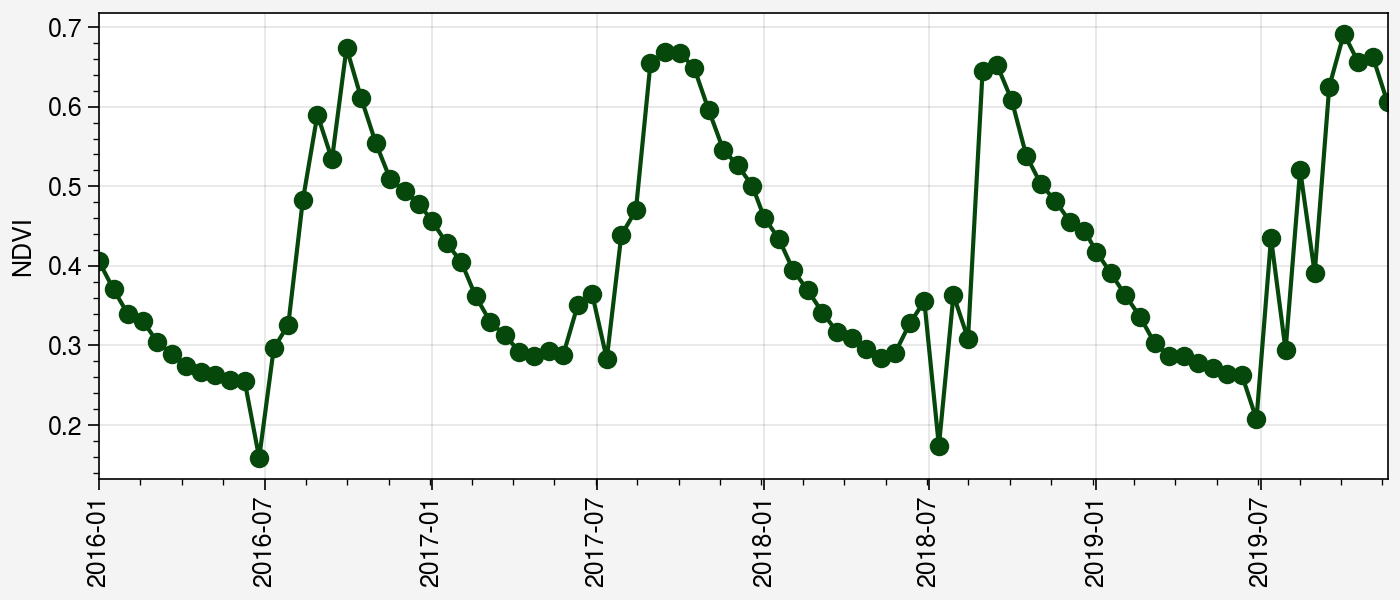

In [134]:
fig, ax = plot.subplots(figsize=(7, 3), tight=True)
ax.plot(m_ndvi.dataframe.index, m_ndvi.dataframe['NDVI'],
        color='forest green', marker='o')
plot.show()

In [135]:
m_evi = chart.Image.series(**{'imageCollection': scaled_evi,
                                   'region': Maharashtra,
                                   'reducer': ee.Reducer.mean(),
                                   'scale': 1000,
                                   'xProperty': 'system:time_start'})

In [136]:
# monthly averaging
m_evi_monthly = m_evi.dataframe.groupby(pd.Grouper(freq="M")).mean()
m_ndvi_monthly = m_ndvi.dataframe.groupby(pd.Grouper(freq="M")).mean()

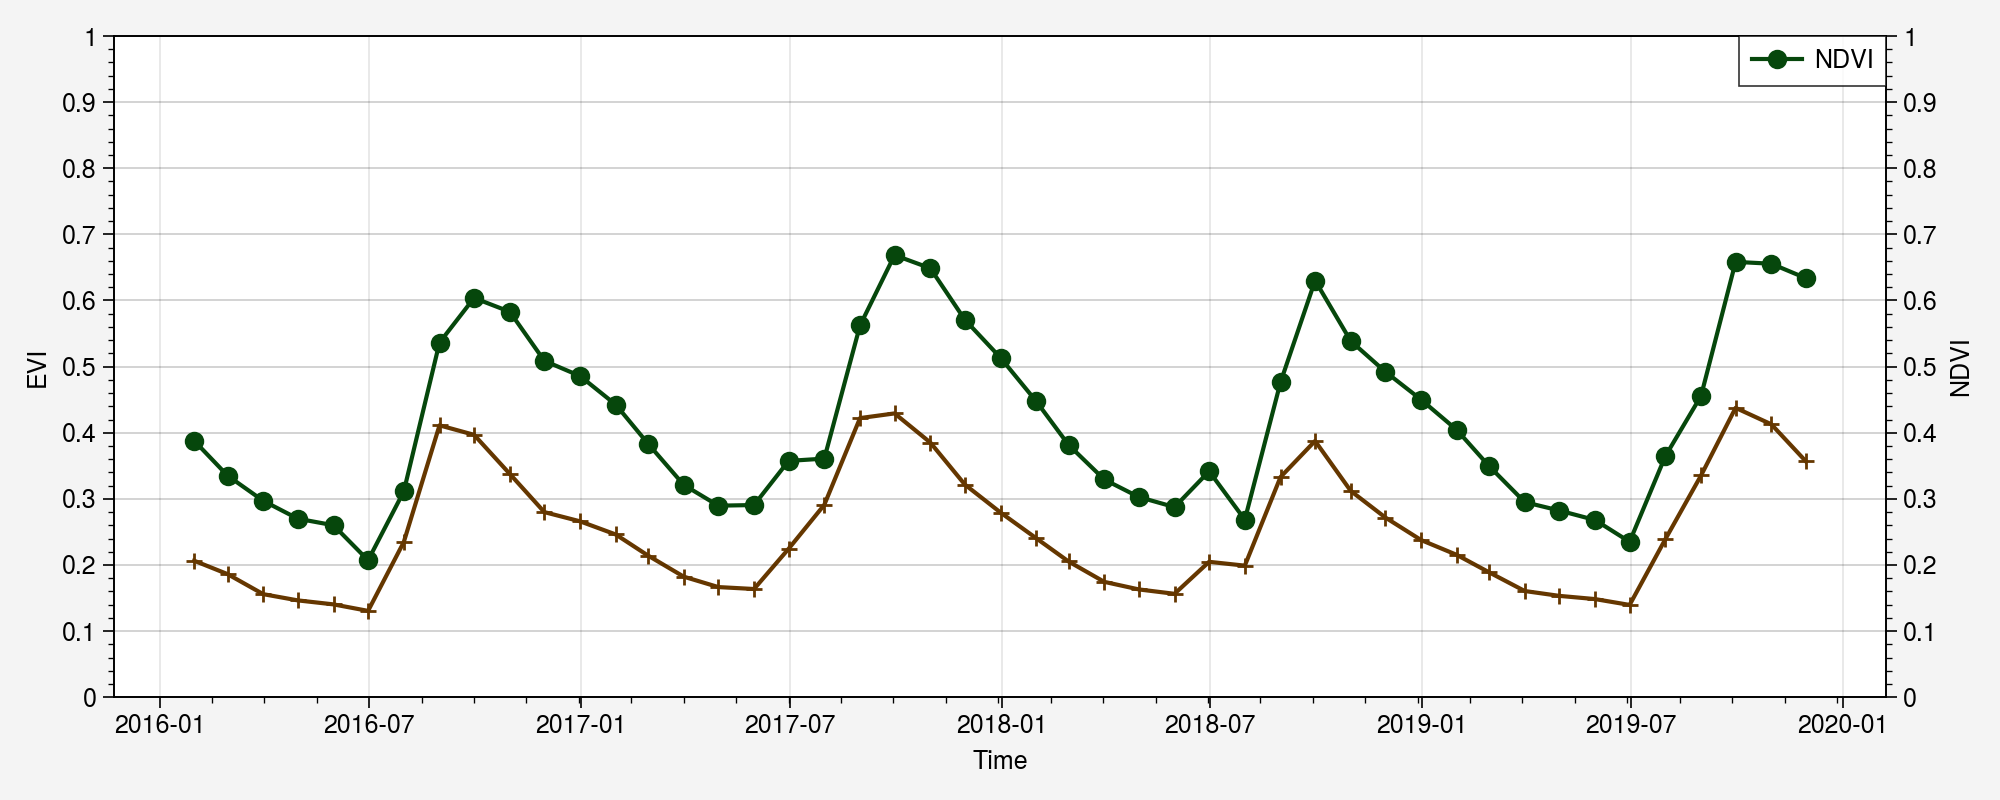

In [137]:
# time index
time = m_evi_monthly.index
# plot
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()
# EVI
ax1.plot(time, m_evi_monthly, label='EVI',
         color='brown', marker='+')
# NDVI
ax2.plot(time, m_ndvi_monthly, label='NDVI',
         color='forest green', marker='o')
ax1.set_xlabel('Time')
ax1.set_ylabel('EVI')
ax2.set_ylabel('NDVI')
ax1.set_yticks(np.arange(0.0, 1.1, 0.1))
ax2.set_yticks(np.arange(0.0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()